In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from twitter_config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Target User Accounts
target_user = ("@FoxNews", "@CBSNews", "@BBCNews", "@CNN", "@nytimes" )

# List for dictionaries of results
results_list = []

# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 pages of tweets (total 200 tweets)
    for x in range(1, 11):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
           

    # Create a dictionaty of results
    user_results = {
        "Username": user,
        "Compound Score": np.mean(compound_list),
        "Postive Score": np.mean(positive_list),
        "Neutral Score": np.mean(neutral_list),
        "Negative Score": np.mean(negative_list)
    }

    # Append dictionary to list
    results_list.append(user_results)

    # Print the Averages
    print(f"User: {user}")
    print(f"Compound: {np.mean(compound_list):.3f}")
    print(f"Positive: {np.mean(positive_list):.3f}")
    print(f"Neutral: {np.mean(neutral_list):.3f}")
    print(f"Negative: {np.mean(negative_list):.3f}")

User: @FoxNews
Compound: -0.112
Positive: 0.059
Neutral: 0.826
Negative: 0.115
User: @CBSNews
Compound: -0.149
Positive: 0.047
Neutral: 0.844
Negative: 0.109
User: @BBCNews
Compound: -0.138
Positive: 0.049
Neutral: 0.827
Negative: 0.125
User: @CNN
Compound: -0.069
Positive: 0.055
Neutral: 0.863
Negative: 0.082
User: @nytimes
Compound: -0.062
Positive: 0.050
Neutral: 0.875
Negative: 0.075


In [3]:
# Create DataFrame from Results List
results_df = pd.DataFrame(results_list).set_index("Username").round(3)
results_df

,Compound Score,Negative Score,Neutral Score,Postive Score
Username,,,,
@FoxNews,-0.112,0.115,0.826,0.059
@CBSNews,-0.149,0.109,0.844,0.047
@BBCNews,-0.138,0.125,0.827,0.049
@CNN,-0.069,0.082,0.863,0.055
@nytimes,-0.062,0.075,0.875,0.050


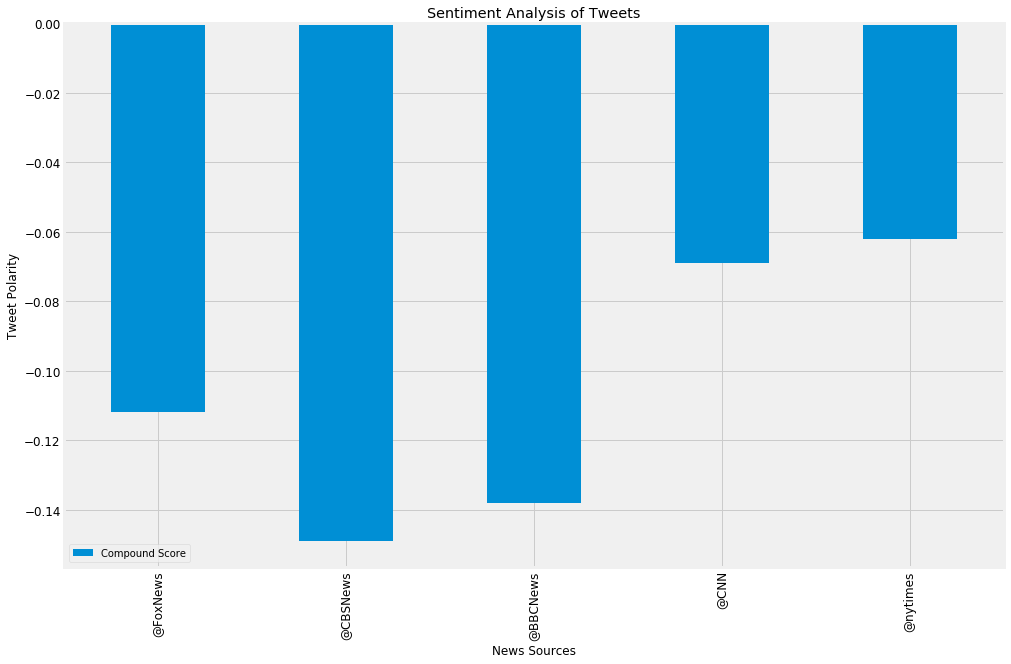

In [5]:
ax = results_df[['Compound Score']].plot(kind='bar', title =("Sentiment Analysis of Tweets"), figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("News Sources", fontsize=12)
ax.set_ylabel("Tweet Polarity", fontsize=12)
plt.show()